✅ Model loaded successfully
Found 3043 images belonging to 10 classes.
96/96 ━━━━━━━━━━━━━━━━━━━━ 67s 643ms/step - accuracy: 0.8860 - loss: 0.3529
✅ Test Accuracy: 0.8860
✅ Test Loss: 0.3529
96/96 ━━━━━━━━━━━━━━━━━━━━ 65s 660ms/step


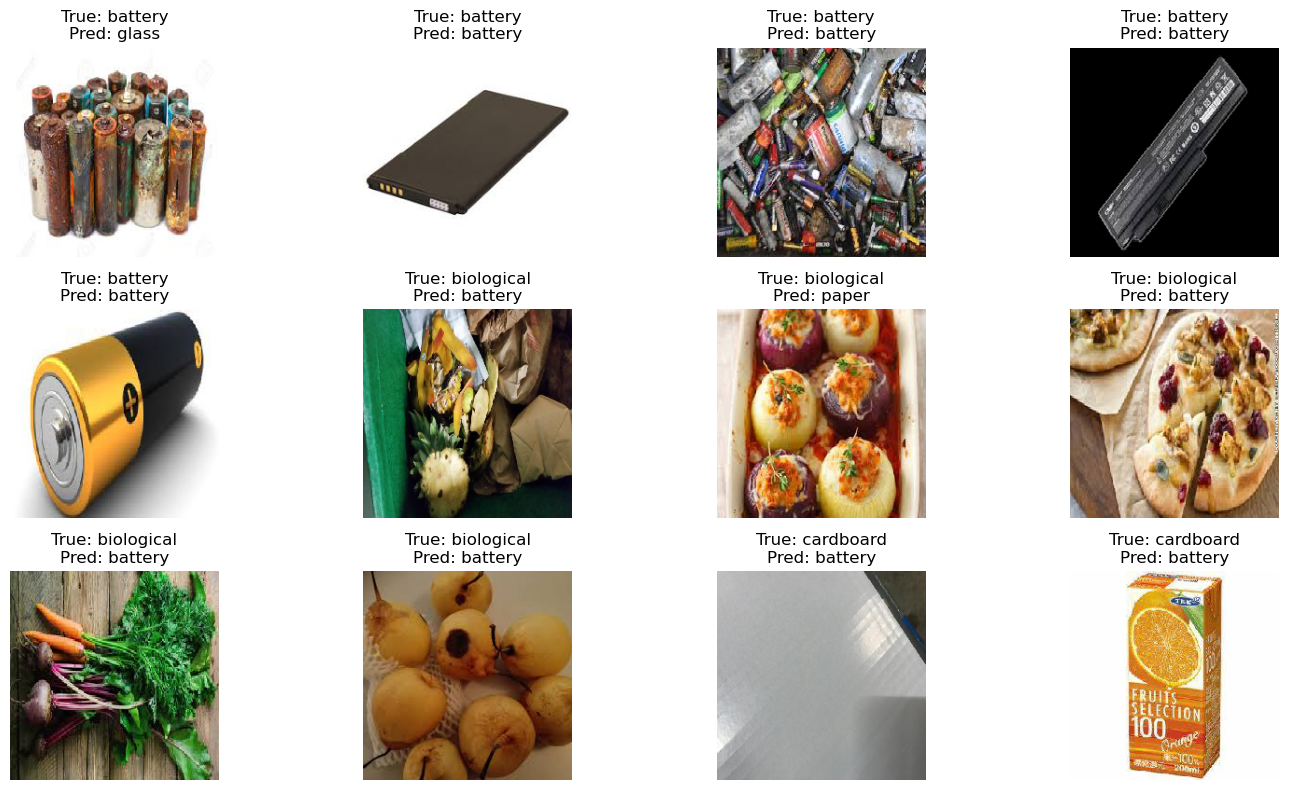

In [5]:
# ==============================
# Step 7: Predict & Visualize on Test Data (Fixed)
# ==============================

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

# ------------------------------
# 1️⃣ Load the saved model
# ------------------------------
model = load_model("models/best_model.keras")
print("✅ Model loaded successfully")

# ------------------------------
# 2️⃣ Set paths
# ------------------------------
TEST_DIR = r"C:/Users/uthay/Desktop/cv-waste-classification/data/processed/test"  # use processed test set

# ------------------------------
# 3️⃣ Create test data generator
# ------------------------------
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

test_gen = ImageDataGenerator(rescale=1./255)

test_data = test_gen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

# ------------------------------
# 4️⃣ Evaluate model on test data
# ------------------------------
test_loss, test_acc = model.evaluate(test_data)
print(f"✅ Test Accuracy: {test_acc:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")

# ------------------------------
# 5️⃣ Get predictions
# ------------------------------
test_data.reset()
preds = model.predict(test_data)
pred_labels = np.argmax(preds, axis=1)
true_labels = test_data.classes
class_labels = list(test_data.class_indices.keys())

# ------------------------------
# 6️⃣ Visualize some predictions
# ------------------------------
NUM_IMAGES = 12
plt.figure(figsize=(15, 8))

for i in range(NUM_IMAGES):
    img, label = test_data[i][0][0], test_data[i][1][0]  # first image in batch
    plt.subplot(3, 4, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"True: {class_labels[np.argmax(label)]}\nPred: {class_labels[pred_labels[i]]}")

plt.tight_layout()
plt.show()
